In [187]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy.special import stdtrit

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/code/rundata/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/code/rundata/run_data.csv")

In [188]:

print("Avg significance, avg number of deviations, avg percentage of stat. signif. comparison")
print(df['AvgSignificance'].mean())
print(df["AvgNumberDev"].mean())
print(df["PerSignif"].mean())
print('---')
SharpeNT = df['SharpeNT'].mean()
SharpeTF = df['SharpeTF'].mean()
print([SharpeNT, SharpeTF])
Delta = SharpeNT - SharpeTF





Avg significance, avg number of deviations, avg percentage of stat. signif. comparison
0.7232399068324663
0.8288524935841082
3.795942960433822
---
[1.4086102336972708, 1.0327719831287947]


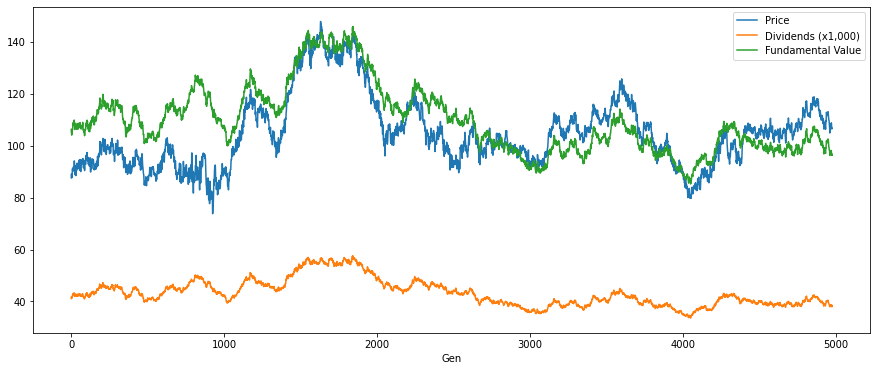

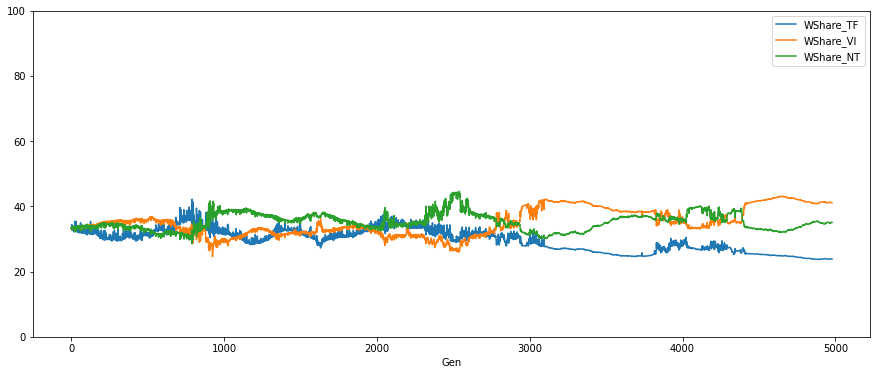

In [189]:
df['Fundamental Value'] = df['Mean_VI']
df['Dividends (x1,000)'] = 10000 * df['Dividends']
df.plot(x="Gen", y = ['Price', 'Dividends (x1,000)', 'Fundamental Value'],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()

In [190]:
""" Sharpe ratios based on annual returns """

SharpeNT = np.nanmean(df['NT_AnnualReturns']) / np.nanstd(df['NT_AnnualReturns'])
SharpeVI = np.nanmean(df['VI_AnnualReturns']) / np.nanstd(df['VI_AnnualReturns'])
SharpeTF = np.nanmean(df['TF_AnnualReturns']) / np.nanstd(df['TF_AnnualReturns'])

print('Annual Sharpe ratios ')
print(SharpeNT, SharpeVI, SharpeTF)
print('Annual mean returns  ')
print([np.nanmean(df['NT_AnnualReturns']), np.nanmean(df['VI_AnnualReturns']), np.nanmean(df['TF_AnnualReturns'])])
print('Annual std returns')
print([np.nanstd(df['NT_AnnualReturns']), np.nanstd(df['VI_AnnualReturns']), np.nanstd(df['TF_AnnualReturns'])])



print("Exponent of time required to detect, NTvsTF")
T = len(df['Gen'])
SENT = np.sqrt((1 + 0.5 * SharpeNT ** 2)/T)
SETF = np.sqrt((1 + 0.5 * SharpeTF ** 2)/T)
Pooled = (SENT + SETF) / np.sqrt(2)

if SharpeNT < SharpeTF:
        DS = SharpeTF - SharpeNT
        boundTF = SharpeTF - 1.96 * SETF
        boundNT = SharpeNT + 1.96 * SENT
        S = (abs(boundTF - boundNT)) / Pooled
else:
        DS = SharpeNT - SharpeTF
        boundTF = SharpeTF + 1.96 * SETF
        boundNT = SharpeNT - 1.96 * SENT
        S = (abs(boundNT - boundTF)) / Pooled


''' if we aply the Doyne formula with pooled and bounds'''

print([SENT, SETF, S, Pooled])
k = np.log(T) / np.log(S / DS)
print(k)

''' if we apply the correct Doyne formula approximated'''
DeltaS = SharpeNT - SharpeTF
print(DeltaS, T)
s = np.sqrt(T) * DeltaS
print("s with approximated formula")
print(s)

SEDeltaS = np.sqrt((1 + 0.5 * (DeltaS ** 2))/T)
print([SEDeltaS, SENT, SETF])
print(" t test value")
print(DeltaS / SEDeltaS)
print("SEDEltaS from Lo")
print(SEDeltaS)

''' we can see that there is a gap '''

''' if we use the full formula, not the approximation '''
print("s with correct formula")
s = np.sqrt((T * DeltaS ** 2)/(1 + 0.5 * DeltaS ** 2))
print(s)

''' and the only reason it does not fit our data is that our data does not use the same test and measures are odd'''


''' with the difference '''
Sharpediff = np.nanmean(df['NT_AnnualReturns']-df['TF_AnnualReturns']) / np.nanstd((df['NT_AnnualReturns']-df['TF_AnnualReturns']))
SEdiff = np.sqrt((1 + 0.5 * Sharpediff ** 2) / T)
print('SE Diff')
print(SEdiff)
print("t test value for difference")
print([Sharpediff/SEdiff, Sharpediff, SEdiff])

print("checking now with k")
k = np.log(T) / np.log(s / DeltaS)
print(k)
print(T)
print((s/DeltaS) ** 2)
print((s/DeltaS) ** k)
N2 = ((s/DeltaS) ** 2) * (1 + 0.5 * DeltaS ** 2)
print(N2)





Annual Sharpe ratios 
0.8853680726901111 1.0684386079159593 0.8854462458930958
Annual mean returns  
[0.14523687505926752, 0.153311802276002, 0.1237903524390273]
Annual std returns
[0.1640412383721703, 0.14349144737014324, 0.13980560989805485]
Exponent of time required to detect, NTvsTF
[0.016720102334213744, 0.016720518038482346, 2.7685526147589443, 0.023646089432618412]
0.8127025172628183
-7.817320298475483e-05 4979
s with approximated formula
-0.005516059851154227
[0.014171928009052925, 0.016720102334213744, 0.016720518038482346]
 t test value
-0.005516059842726999
SEDEltaS from Lo
0.014171928009052925
s with correct formula
0.0055160598427269995
SE Diff
0.014227200520842772
t test value for difference
[8.787671229361719, 0.1250239606913701, 0.014227200520842772]
checking now with k
nan
4979
4978.999984786545
nan
4979.000000000002


/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_11733/622407737.py:73: RuntimeWarning: invalid value encountered in log
  k = np.log(T) / np.log(s / DeltaS)


In [191]:
print("---- JKM approx ------")
from scipy.stats import pearsonr
rho = df['NT_AnnualReturns'].corr(df['TF_AnnualReturns'])
print(rho)
print([SharpeNT, SharpeTF, DeltaS])
SE_JKM  = np.sqrt((1/T) * (2 - 2*rho + 0.5*(SharpeNT**2 + SharpeTF**2 - 2*SharpeNT*SharpeTF*(rho**2))))
print(SE_JKM)
''' hence we can compute t'''
t_JKM = DeltaS / SE_JKM
print(t_JKM)
term = (2 - 2*rho + 0.5*(SharpeNT**2 + SharpeTF**2 - 2*SharpeNT*SharpeTF*(rho**2)))
print('FInal time')
T_JKM = term * (t_JKM / DeltaS) ** 2 
print(T_JKM)
print(T)

print('IN THE DATA')
SharpeNTD = df['SharpeNT'].mean()
SharpeTFD = df['SharpeTF'].mean()
DeltaS_Data = df['SharpeNT'].mean() - df['SharpeTF'].mean()
print([df['SharpeNT'].mean(),  df['SharpeTF'].mean(), DeltaS_Data])
adj = np.sqrt(252)
print([adj * df['SharpeNT'].mean(),  adj * df['SharpeTF'].mean(), DeltaS_Data])
rho_Data = df['SharpeNT'].corr(df['SharpeTF'])
print(rho_Data)
term = (2 - 2*rho_Data + 0.5*(SharpeNTD**2 + SharpeTFD**2 - 2*SharpeNTD*SharpeTFD*(rho_Data**2)))
print("avgsignif")
t_data1 = df['AvgSignificance'].mean()
print(t_data1)
t_data = DeltaS_Data / np.sqrt((1/T)*((2 - 2*rho_Data + 0.5*term)))
print(t_data)
print('avgnumberdev')
print(df['AvgNumberDev'].mean())
T_Data = term * ((t_data / DeltaS_Data) ** 2)
print(T_Data)
T_Data1 = term * ((t_data1 * 100 / DeltaS_Data) ** 2)
print(T_Data1)
print("per_signif")
print(df['PerSignif'].mean())

---- JKM approx ------
0.3712716999142434
[0.8853680726901111, 0.8854462458930958, -7.817320298475483e-05]
0.019705306541172377
-0.003967114280684713
FInal time
4979.0
4979
IN THE DATA
[1.4086102336972708, 1.0327719831287947, 0.3758382505684761]
[22.360994235501323, 16.394746970362714, 0.3758382505684761]
0.9047288926605728
avgsignif
0.7232399068324663
39.3970937318098
avgnumberdev
0.8288524935841082
5770.569422725497
19447.10960330775
per_signif
3.795942960433822


In [192]:
print(df['SharpeDiff'].mean())
SharpeNT = np.nanmean(df['NT_AnnualReturns']) / np.nanstd(df['NT_AnnualReturns'])
SharpeVI = np.nanmean(df['VI_AnnualReturns']) / np.nanstd(df['VI_AnnualReturns'])
SharpeTF = np.nanmean(df['TF_AnnualReturns']) / np.nanstd(df['TF_AnnualReturns'])
print((abs(SharpeNT - SharpeVI) + abs(SharpeVI - SharpeTF) + abs(SharpeNT - SharpeTF))/3)


0.08384636188849295
0.12204702348389884


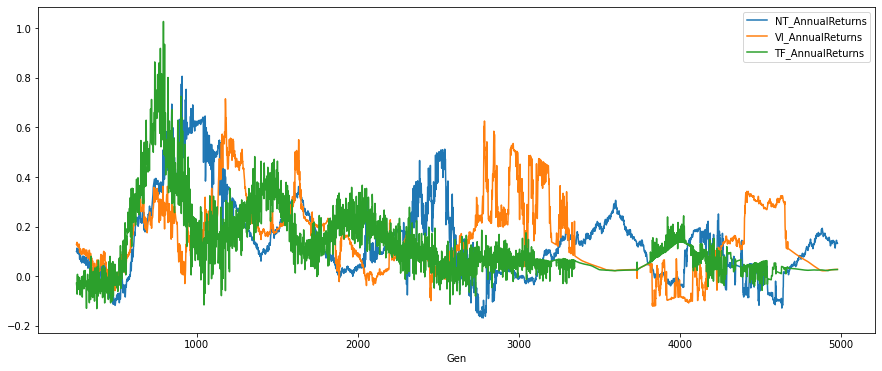

In [193]:
df.plot(x="Gen", y = ["NT_AnnualReturns", "VI_AnnualReturns", "TF_AnnualReturns"],
        kind="line", figsize=(15, 6))
plt.show()

[3.1486015655366346, 3.4527762170578704, 3.9422659770343045]
[1.4086102336972708, 0.882020525051592, 1.0327719831287947]


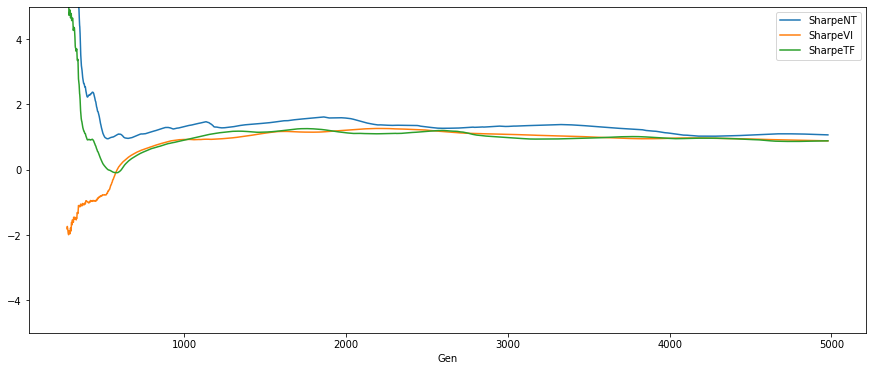

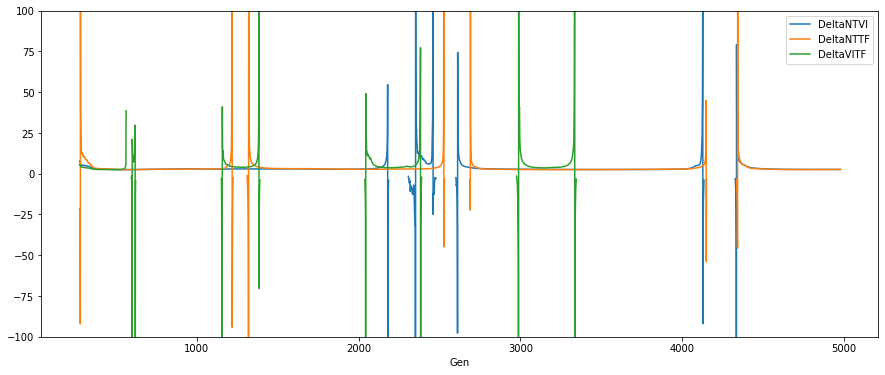

In [194]:
print([df['DeltaNTVI'].mean(),df['DeltaNTTF'].mean(),df['DeltaVITF'].mean()])
print([df['SharpeNT'].mean(),df['SharpeVI'].mean(),df['SharpeTF'].mean()])

df.plot(x="Gen", y = ["SharpeNT", "SharpeVI", "SharpeTF"],
        kind="line", figsize=(15, 6))
plt.ylim(-5,5)
plt.show()


df.plot(x="Gen", y = ["DeltaNTVI", "DeltaNTTF", "DeltaVITF"],
        kind="line", figsize=(15, 6))
plt.ylim(-100,100)
plt.show()

In [195]:

if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()

In [196]:
if df['Rep'].sum() != 0:
        df['Rep10'] = 2 * df['Rep']
        df.plot(x="Gen", y = ['Rep10','WShare_TF'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_VI'],
        kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_NT'],
        kind="line", figsize=(15, 6))
        plt.show()

In [197]:
if df['CountSelected'].sum() != 0 or df['CountMutated'].sum() != 0 or df['CountCrossed'].sum() != 0:

        df.plot(x="Gen", y = ["CountSelected", 'CountMutated', 'CountCrossed'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy outflows')
        df.plot(x="Gen", y = ["FromNT", 'FromVI', 'FromTF'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy inflows')
        df.plot(x="Gen", y = ["TowardsNT", 'TowardsVI', 'TowardsTF'],
                kind="line", figsize=(15, 6))
        plt.show()

In [198]:
if df['Spoils'].sum() != 0:
        df.plot(x="Gen", y = ['Spoils'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['PerSpoils'],
                kind="line", figsize=(15, 6))
        plt.show()

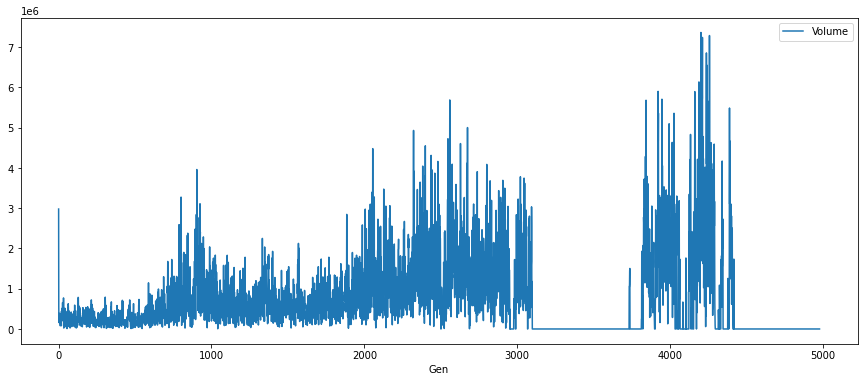

0       2.979843e+06
1       5.466888e+05
2       1.597323e+05
3       3.465421e+05
4       3.883160e+05
            ...     
4974    0.000000e+00
4975    0.000000e+00
4976    0.000000e+00
4977    0.000000e+00
4978    0.000000e+00
Name: Volume, Length: 4979, dtype: float64


In [199]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

print(df['Volume'])

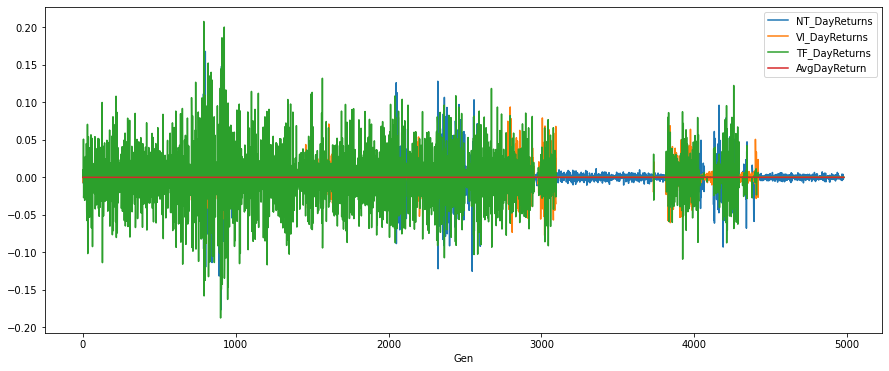

In [200]:
df.plot(x="Gen", y = ["NT_DayReturns", "VI_DayReturns", "TF_DayReturns", 'AvgDayReturn'],
        kind="line", figsize=(15, 6))
plt.show()

0.7232399068324663


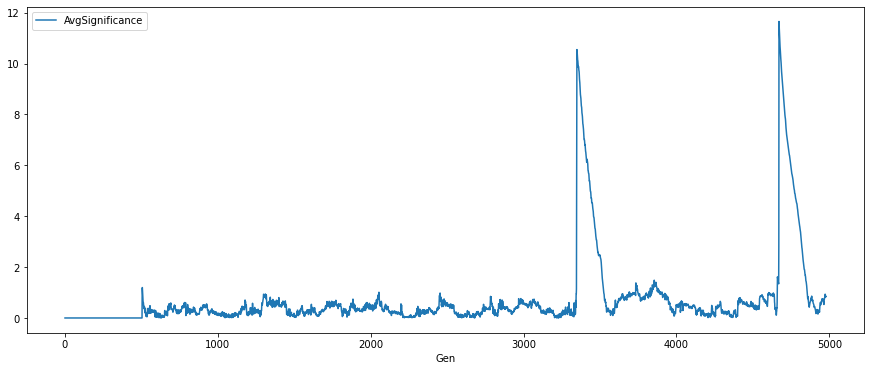

In [201]:
if df['AvgSignificance'].sum() != 0:

        print(df['AvgSignificance'].mean())

        df.plot(x="Gen", y = ["AvgSignificance"],
                kind="line", figsize=(15, 6))
        plt.show()


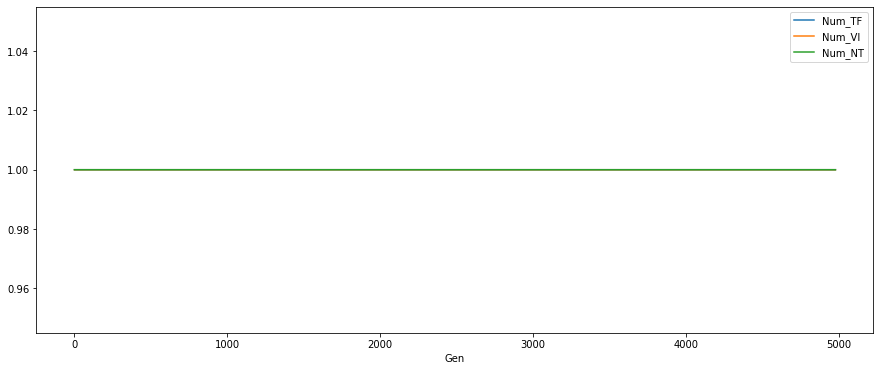

In [202]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


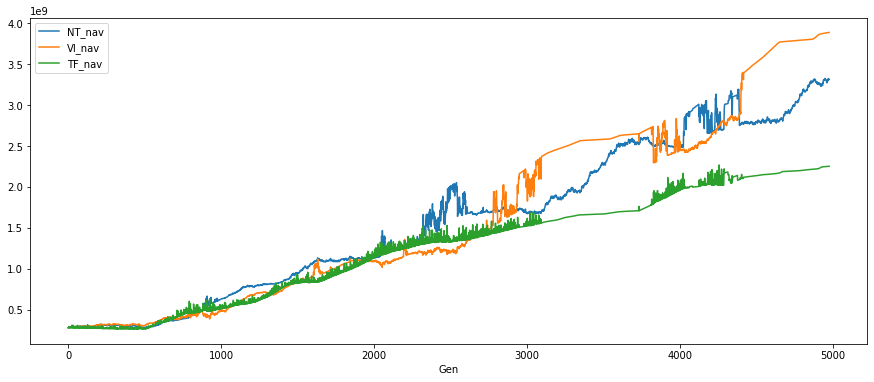

In [203]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()


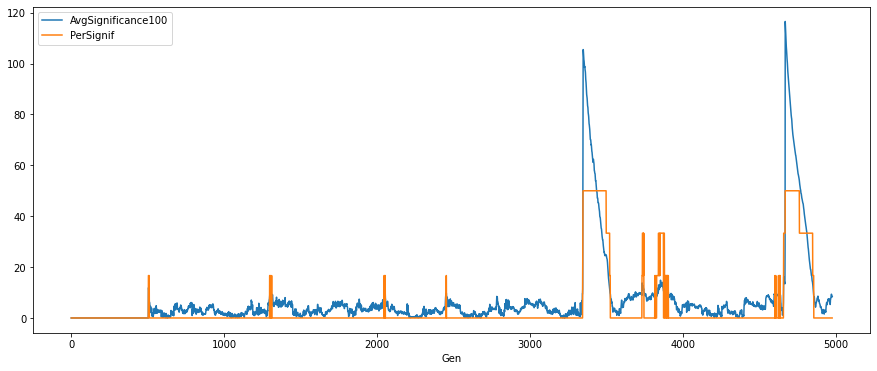

In [204]:
if df['AvgSignificance'].sum() != 0:
        df['AvgSignificance100'] = 10 * df["AvgSignificance"]

        df.plot(x="Gen", y = ["AvgSignificance100", "PerSignif"],
                kind="line", figsize=(15, 6))
        plt.show()

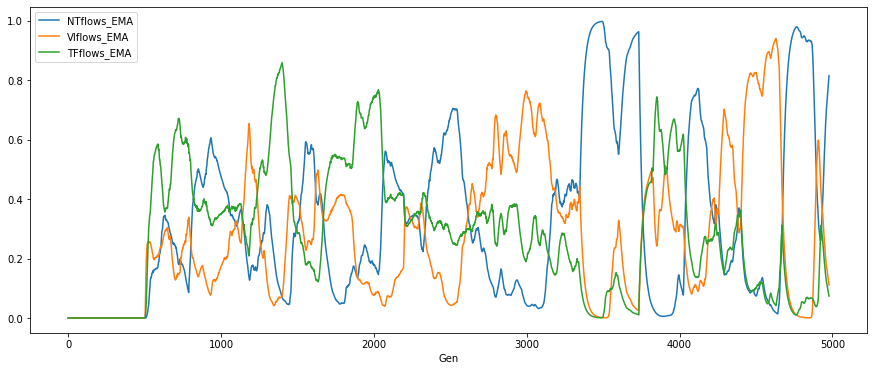

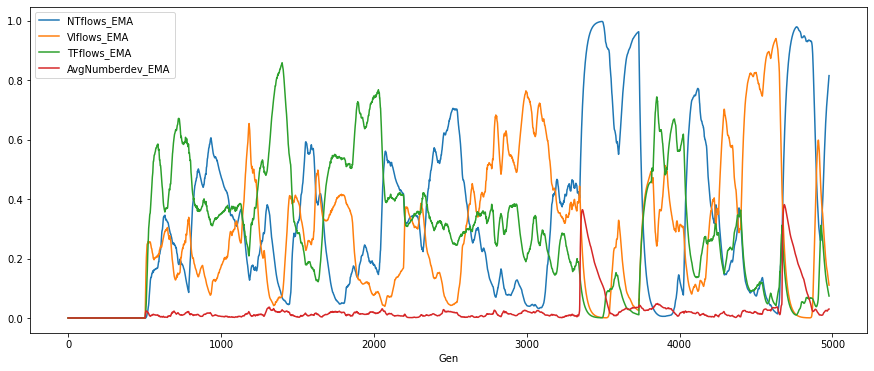

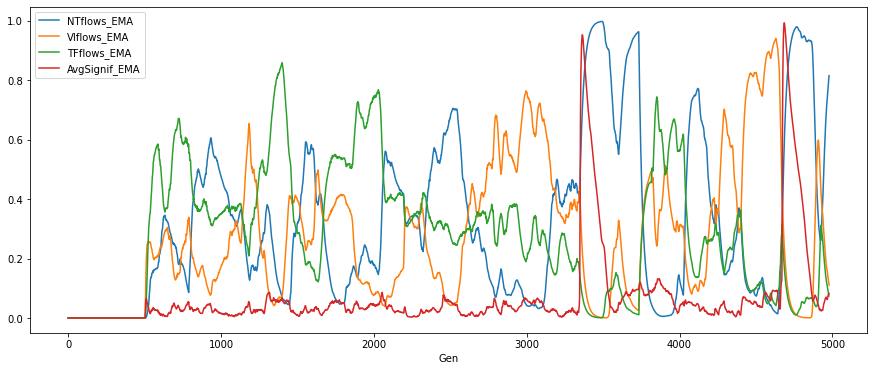

In [205]:
# df.plot(x="Gen", y = ["NTflows", "VIflows", "TFflows"],
#         kind="line", figsize=(15, 6))
# plt.show()

span = 252/5

df['NTflows_EMA'] = pd.Series.ewm(df['NTflows'], span=span).mean()
df['VIflows_EMA'] = pd.Series.ewm(df['VIflows'], span=span).mean()
df['TFflows_EMA'] = pd.Series.ewm(df['TFflows'], span=span).mean()

df.plot(x="Gen", y = ["NTflows_EMA", "VIflows_EMA", "TFflows_EMA"],
        kind="line", figsize=(15, 6))
plt.show()



df['AvgNumberdev_EMA'] = pd.Series.ewm(df['AvgNumberDev'], span=span/5).mean() / 30

df.plot(x="Gen", y = ["NTflows_EMA", "VIflows_EMA", "TFflows_EMA", "AvgNumberdev_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

df['AvgSignif_EMA'] = pd.Series.ewm(df['AvgSignificance'], span=span/5).mean() / 10

df.plot(x="Gen", y = ["NTflows_EMA", "VIflows_EMA", "TFflows_EMA", "AvgSignif_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

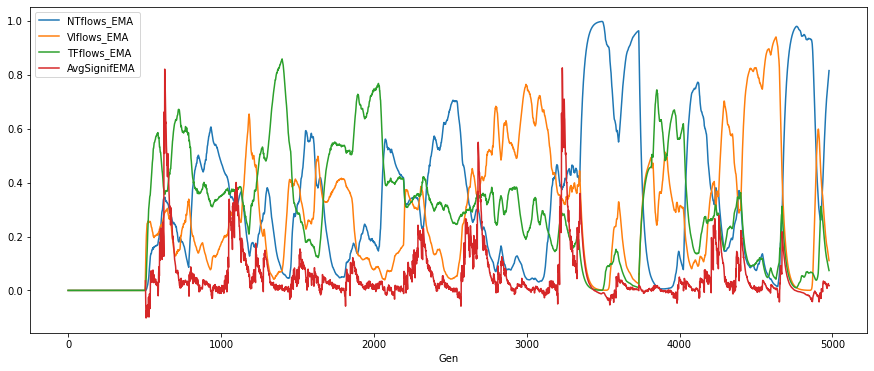

In [206]:
df['AvgSignifEMA'] = pd.Series.ewm(df['AvgSignificance'].pct_change(), span=span).mean() 
# df['AvgSignifEMA'] = df['AvgSignificance'].pct_change(periods=21) / 1000


df.plot(x="Gen", y = ["NTflows_EMA", "VIflows_EMA", "TFflows_EMA", "AvgSignifEMA"],
        kind="line", figsize=(15, 6))
plt.show()

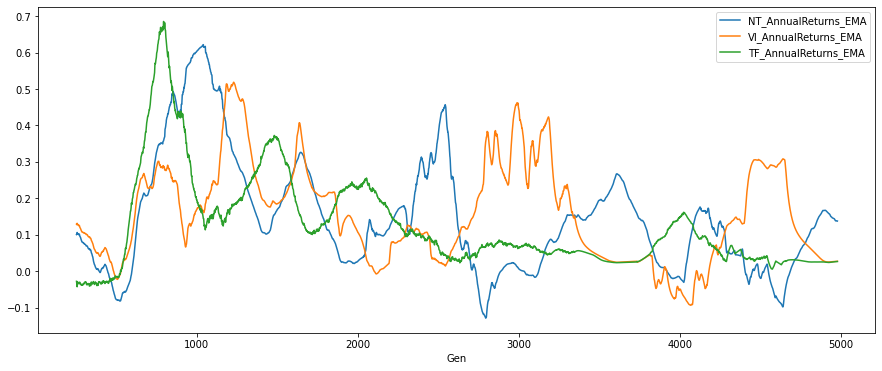

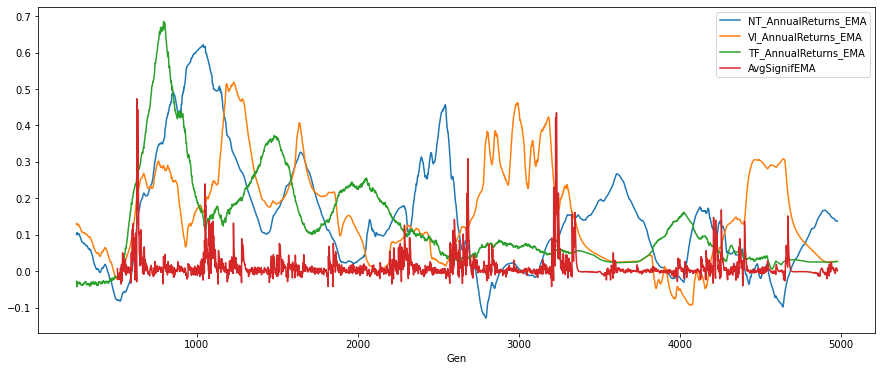

In [207]:

df['NT_AnnualReturns_EMA'] = pd.Series.ewm(df['NT_AnnualReturns'], span=span).mean()
df['VI_AnnualReturns_EMA'] = pd.Series.ewm(df['VI_AnnualReturns'], span=span).mean()
df['TF_AnnualReturns_EMA'] = pd.Series.ewm(df['TF_AnnualReturns'], span=span).mean()

df.plot(x="Gen", y = ["NT_AnnualReturns_EMA", "VI_AnnualReturns_EMA", "TF_AnnualReturns_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

df['AvgSignifEMA'] = df['AvgSignificance'].pct_change(periods=252) / 10000

df['AvgSignifEMA'] = pd.Series.ewm(df['AvgSignificance'].pct_change(), span=span/5).mean()  / 5

df.plot(x="Gen", y = ["NT_AnnualReturns_EMA", "VI_AnnualReturns_EMA", "TF_AnnualReturns_EMA", "AvgSignifEMA"],
        kind="line", figsize=(15, 6))
plt.show()

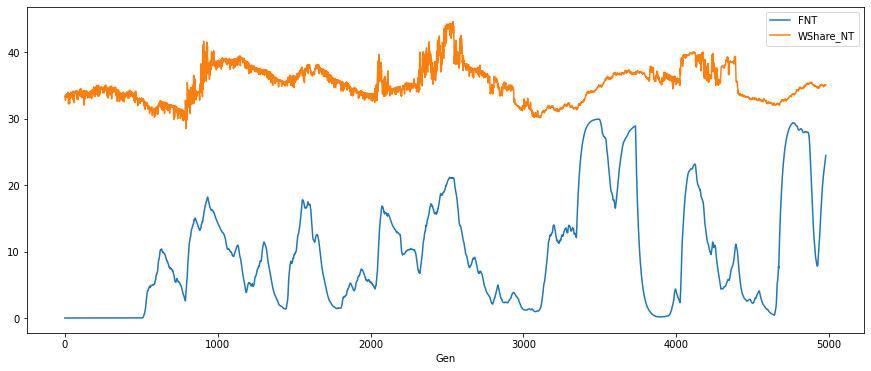

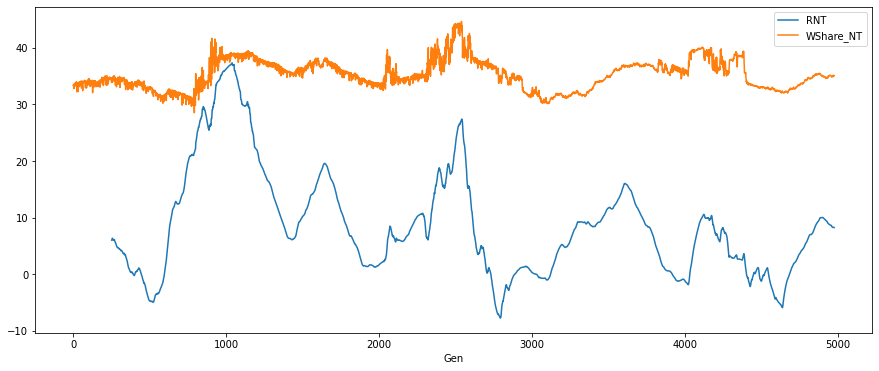

0.23225530677278805
0.47186469250282176


' its like there are support lines '

In [208]:
df['FNT'] = df['NTflows_EMA'] * 30
df['RNT'] = df["NT_AnnualReturns_EMA"] * 60
df.plot(x="Gen", y = ["FNT", "WShare_NT"],
        kind="line", figsize=(15, 6))
plt.show()
df.plot(x="Gen", y = ["RNT", "WShare_NT"],
        kind="line", figsize=(15, 6))
plt.show()
print(df['NTflows'].corr(df['WShare_NT']))
print(df['NT_AnnualReturns'].corr(df['WShare_NT']))
''' its like there are support lines '''

In [209]:
data = pd.DataFrame()
# data['NT_AnnualReturns_EMA'] = df['NT_AnnualReturns_EMA']
# data['VI_AnnualReturns_EMA'] = df['VI_AnnualReturns_EMA']
# data['TF_AnnualReturns_EMA'] = df['TF_AnnualReturns_EMA']
data['NTflows_EMA'] = df['NTflows_EMA']
data['VIflows_EMA'] = df['VIflows_EMA']
data['TFflows_EMA'] = df['TFflows_EMA']
data['AvgSignificance'] = df['AvgSignificance']
data['PerSignif'] = df['PerSignif']
print(data.corr())

# # data = pd.DataFrame()
# data['NTflows'] = df['NTflows']
# data['VIflows'] = df['VIflows']
# data['TFflows'] = df['TFflows']
# data['NT_AnnualReturns'] = df['NT_AnnualReturns']
# data['VI_AnnualReturns'] = df['VI_AnnualReturns']
# data['TF_AnnualReturns'] = df['TF_AnnualReturns']
# data.corr()

# ''' Chances of moving in the same direction '''
Total = len(df['NTflows'])


def getjoint(x, y):
    N = len(x)
    serie = []
    for i in range(N):
        if x.loc[i] > 0 and y.loc[i] > 0:
            serie.append(1)
        if x.loc[i] < 0 and y.loc[i] < 0:
            serie.append(-1)
    return serie



ChanceNTVI = 100 * len(getjoint(data['NTflows_EMA'].pct_change(), data['VIflows_EMA'].pct_change())) / Total
print(ChanceNTVI)

ChanceTFVI = 100 * len(getjoint(data['TFflows_EMA'].pct_change(), data['VIflows_EMA'].pct_change())) / Total
print(ChanceTFVI)

ChanceNTTF = 100 * len(getjoint(data['NTflows_EMA'].pct_change(), data['TFflows_EMA'].pct_change())) / Total
print(ChanceNTTF)

ChanceNTSig = 100 * len(getjoint(data['NTflows_EMA'].pct_change(), data['AvgSignificance'].pct_change())) / Total
print(ChanceNTSig)

ChanceVISig = 100 * len(getjoint(data['VIflows_EMA'].pct_change(), data['AvgSignificance'].pct_change())) / Total
print(ChanceVISig)

ChanceTFSig = 100 * len(getjoint(data['TFflows_EMA'].pct_change(), data['AvgSignificance'].pct_change())) / Total
print(ChanceTFSig)




                 NTflows_EMA  VIflows_EMA  TFflows_EMA  AvgSignificance  \
NTflows_EMA         1.000000    -0.419364    -0.302193         0.458519   
VIflows_EMA        -0.419364     1.000000     0.074017        -0.143066   
TFflows_EMA        -0.302193     0.074017     1.000000        -0.227634   
AvgSignificance     0.458519    -0.143066    -0.227634         1.000000   
PerSignif           0.504265    -0.233549    -0.270674         0.887444   

                 PerSignif  
NTflows_EMA       0.504265  
VIflows_EMA      -0.233549  
TFflows_EMA      -0.270674  
AvgSignificance   0.887444  
PerSignif         1.000000  
22.514561156858807
36.453103032737495
32.45631652942358
42.13697529624422
46.17393050813416
46.635870656758385


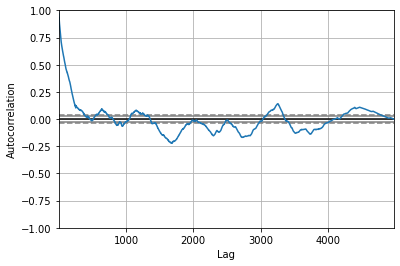

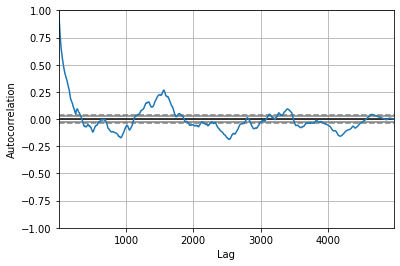

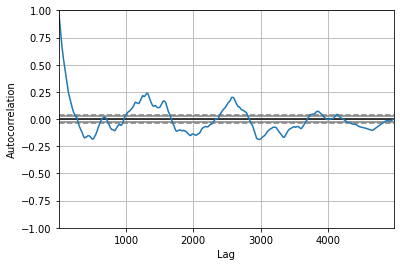

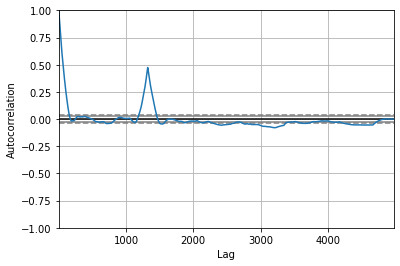

In [210]:
''' there is periodicity in flows EMA '''

x = pd.plotting.autocorrelation_plot(df['TFflows'])
x.plot()
plt.show()

x = pd.plotting.autocorrelation_plot(df['VIflows'])
x.plot()
plt.show()

x = pd.plotting.autocorrelation_plot(df['NTflows'])
x.plot()
plt.show()

x = pd.plotting.autocorrelation_plot(df['AvgSignificance'])
x.plot()
plt.show()



In [211]:
from scipy.signal import periodogram


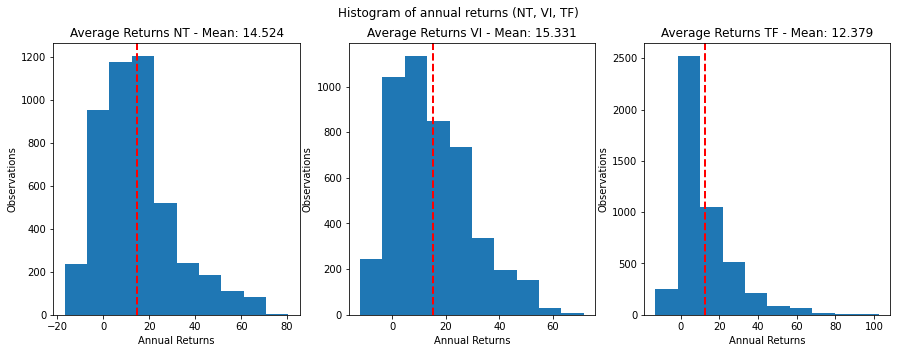

In [212]:
''' Histogram of the annual strategy returns '''

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), sharex = False)
fig.suptitle('Histogram of annual returns (NT, VI, TF)')

ax1.hist(100 * df['NT_AnnualReturns'])
num = 100 * df['NT_AnnualReturns'].mean()
ax1.set_title('Average Returns NT - Mean: %1.3f' % num)
ax1.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax2.hist(100 * df['VI_AnnualReturns'])
num = 100 * df['VI_AnnualReturns'].mean()
ax2.set_title('Average Returns VI - Mean: %1.3f' % num)
ax2.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax3.hist(100 * df['TF_AnnualReturns'])
num = 100 * df['TF_AnnualReturns'].mean()
ax3.set_title('Average Returns TF - Mean: %1.3f' % num)
ax3.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax1.set_ylabel('Observations')
ax1.set_xlabel('Annual Returns')
ax2.set_ylabel('Observations')
ax2.set_xlabel('Annual Returns')
ax3.set_ylabel('Observations')
ax3.set_xlabel('Annual Returns')
plt.show()

In [213]:
''' Price autocorrelation '''

print((df['Price'].pct_change()).autocorr(lag=1))

0.37605359863301446
